In [1]:
from Cpp_code.former_class_cpp import FormerGame
from heuristics import play_game_with_minimizing_groups, play_game_choosing_largest_group, play_game_randomly, play_game_with_minimizing_groups
import numpy as np
import matplotlib.pyplot as plt
import daily_board as db
import time
import pandas as pd
from figure_functions import plot_heuristic_distributions

/Users/espen/Desktop/masteroppgave_uten_chat/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 6.1: Self-made heuristics

Here is code used to measure heuristic performance.

In [3]:
# Test on n_boards boards
n_boards = 1000
np.random.seed(22)
boards = np.random.randint(0,4, (n_boards, 9, 7))

moves_random = np.zeros(n_boards)
moves_largest_group = np.zeros(n_boards)
moves_min_groups_1 = np.zeros(n_boards)
moves_min_groups_2 = np.zeros(n_boards)
moves_min_groups_3 = np.zeros(n_boards)

times_random = np.zeros(n_boards)
times_largest_group = np.zeros(n_boards)
times_min_groups_1 = np.zeros(n_boards)
times_min_groups_2 = np.zeros(n_boards)
times_min_groups_3 = np.zeros(n_boards)

for n in range(n_boards):
    board = boards[n]
    if n % 50 == 0:
        print(f"Board {n}/{n_boards}")
    t0 = time.time()
    moves_random[n] = play_game_randomly(board)
    t1 = time.time()
    times_random[n] = t1 - t0
    
    t0 = time.time()
    moves_largest_group[n] = play_game_choosing_largest_group(board)
    t1 = time.time()
    times_largest_group[n] = t1 - t0
    
    t0 = time.time()
    moves_min_groups_1[n] = play_game_with_minimizing_groups(board, T=1)[0]
    t1 = time.time()
    times_min_groups_1[n] = t1 - t0

    t0 = time.time()
    moves_min_groups_2[n] = play_game_with_minimizing_groups(board, T=2)[0]
    t1 = time.time()
    times_min_groups_2[n] = t1 - t0
    
    t0 = time.time()
    moves_min_groups_3[n] = play_game_with_minimizing_groups(board, T=3)[0]
    t1 = time.time()
    times_min_groups_3[n] = t1 - t0

Board 0/1000


KeyboardInterrupt: 

In [ ]:
# Save results and print table
df = pd.DataFrame({
    'Method': ['Random'] * n_boards +
              ['Largest group'] * n_boards +
              ['Min groups (1)'] * n_boards +
              ['Min groups (2)'] * n_boards +
              ['Min groups (3)'] * n_boards,
    'Moves': np.concatenate([moves_random, moves_largest_group, moves_min_groups_1, moves_min_groups_2, moves_min_groups_3]),
    'Time': np.concatenate([times_random, times_largest_group, times_min_groups_1, times_min_groups_2, times_min_groups_3])
})

csv_path = '/Users/espen/Desktop/masteroppgave_uten_chat/results/6.1_selfmade/selfmade.csv'
df.to_csv(csv_path, index=False)

csv_path = '/Users/espen/Desktop/masteroppgave_uten_chat/results/6.1_selfmade/selfmade.csv'
df_loaded = pd.read_csv(csv_path)

summary = df_loaded.groupby('Method').agg(
    Moves_Mean=('Moves', 'mean'),
    Moves_Std=('Moves', 'std'),
    Time_Mean=('Time', 'mean'),
    Time_Std=('Time', 'std')
).reset_index()

print(summary.to_string(index=False))

        Method  Moves_Mean  Moves_Std  Time_Mean  Time_Std
 Largest group      24.994   4.169574   0.000606  0.000100
Min groups (1)      18.536   2.635080   0.005742  0.001256
Min groups (2)      16.214   1.912030   0.109964  0.031994
Min groups (3)      15.478   1.796871   2.840983  1.107242
        Random      28.670   3.719265   0.000743  0.000107


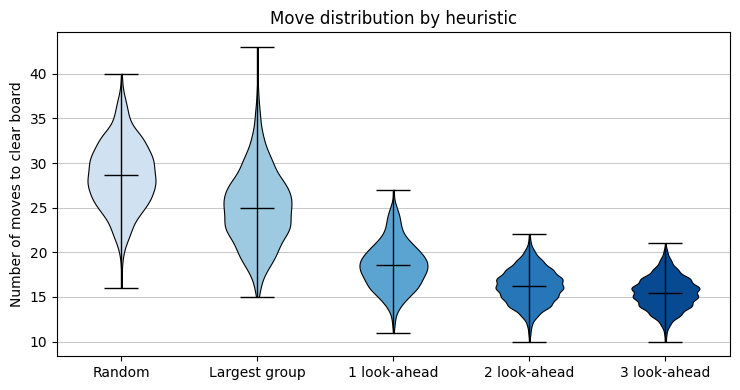

In [5]:
plot_heuristic_distributions(show=True)

In [2]:
# Test on daily boards
# Test on n_boards boards
n_boards = 100
boards = np.random.randint(0,4, (n_boards, 9, 7))

moves_random = np.zeros(n_boards)
moves_largest_group = np.zeros(n_boards)
moves_min_groups_1 = np.zeros(n_boards)
moves_min_groups_2 = np.zeros(n_boards)
moves_min_groups_3 = np.zeros(n_boards)

times_random = np.zeros(n_boards)
times_largest_group = np.zeros(n_boards)
times_min_groups_1 = np.zeros(n_boards)
times_min_groups_2 = np.zeros(n_boards)
times_min_groups_3 = np.zeros(n_boards)

board_tuples = db.get_daily_board()
n = 0
for key, board_tuple in board_tuples.items():
    board = board_tuple[0]
    if n % 10 == 0:
        print(f"Board {n}/{n_boards}")
    t0 = time.time()
    moves_random[n] = play_game_randomly(board)
    t1 = time.time()
    times_random[n] = t1 - t0
    
    t0 = time.time()
    moves_largest_group[n] = play_game_choosing_largest_group(board)
    t1 = time.time()
    times_largest_group[n] = t1 - t0
    
    t0 = time.time()
    moves_min_groups_1[n] = play_game_with_minimizing_groups(board, T=1)[0]
    t1 = time.time()
    times_min_groups_1[n] = t1 - t0

    t0 = time.time()
    moves_min_groups_2[n] = play_game_with_minimizing_groups(board, T=2)[0]
    t1 = time.time()
    times_min_groups_2[n] = t1 - t0
    
    t0 = time.time()
    moves_min_groups_3[n] = play_game_with_minimizing_groups(board, T=3)[0]
    t1 = time.time()
    times_min_groups_3[n] = t1 - t0
    
    n += 1

Board 0/100
Board 10/100
Board 20/100
Board 30/100
Board 40/100
Board 50/100
Board 60/100
Board 70/100
Board 80/100
Board 90/100


In [5]:
best_actual_sols = [bt[1] for _, bt in db.get_daily_board().items()]
best = np.array(best_actual_sols)

# === 2) Put each model’s move‐counts into a dict ===
models = {
    "Random":           moves_random,
    "LargestGroup":     moves_largest_group,
    "MinGroups T=1":    moves_min_groups_1,
    "MinGroups T=2":    moves_min_groups_2,
    "MinGroups T=3":    moves_min_groups_3,
}

# === 3) For each model, count how many boards have deviation d=0,…,10 ===
# (if a model’s deviation exceeds 10, it’ll simply be “>10”, but here we only collect 0…10)
deviation_range = range(0, 11)  # 0 through 10
table_data = {}

for name, moves in models.items():
    diffs = np.abs(moves - best).astype(int)
    # Count how many boards have exactly deviation d, for d=0..10
    counts = [np.sum(diffs == d) for d in deviation_range]
    table_data[name] = counts

# === 4) Build a DataFrame so that “Model” is on the y‐axis (index) and deviations on the columns ===
df = pd.DataFrame(table_data, index=deviation_range).T
df.index.name = "Model"
df.columns.name = "Deviation"

print(df)


Deviation      0   1   2   3   4   5   6   7   8   9   10
Model                                                    
Random          0   0   0   0   0   0   1   1   1   2   6
LargestGroup    0   0   1   0   0   0   4   6   9   9  12
MinGroups T=1   0   4   9  13  23  14  11  15   7   2   2
MinGroups T=2   2  23  25  31  13   3   2   1   0   0   0
MinGroups T=3  10  26  37  15   7   3   2   0   0   0   0
